In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import KFold,train_test_split
from sklearn.feature_selection import SelectFromModel

In [ ]:
def get_scores(y_true, y_pred, classifier_name):
    result = pd.DataFrame()
    result["Classifier"] = [classifier_name]
    result["Accuracy"] = [accuracy_score(y_true, y_pred)]
    result["F1-Score (Macro)"] = [f1_score(y_true, y_pred, average="macro")]
    result["Precision  (Macro)"] = [precision_score(y_true, y_pred, average="macro")]
    result["Recall  (Macro)"] = [recall_score(y_true, y_pred, average="macro")]
    result["F1-Score (Micro)"] = [f1_score(y_true, y_pred, average="micro")]
    result["Precision  (Micro)"] = [precision_score(y_true, y_pred, average="micro")]
    result["Recall  (Micro)"] = [recall_score(y_true, y_pred, average="micro")]
    result["F1-Score (Weighted)"] = [f1_score(y_true, y_pred, average="weighted")]
    result["Precision  (Weighted)"] = [precision_score(y_true, y_pred, average="weighted")]
    result["Recall  (Weighted)"] = [recall_score(y_true, y_pred, average="weighted")]

    return result

# Load Data

In [ ]:
train = pd.read_csv("train.csv", index_col=None)
test = pd.read_csv("test.csv", index_col=None)

# Split Train/Val

In [ ]:
X_train=train.iloc[:,:-3]
y_train=train["Label"]
X_test=test.iloc[:,:-3]
y_test=test["Label"]

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5881, 561) (5881,) (2947, 561) (2947,)


# Validation

In [ ]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
CVAccuracy=[]
weights=["uniform","distance"]
for i in cv.split(X_train):
  for item in weights:
    for j in range(1,10):
      knn = KNeighborsClassifier(n_neighbors = j, weights=item)
        # Fit the classifier to the data
      knn.fit(X_train,y_train)
      CVAccuracy.append([knn.score(X_val, y_val),item,j])
    df = pd.DataFrame (CVAccuracy,columns=['Validation Accuracy',"Distance Weights",'NeighbourSize'])

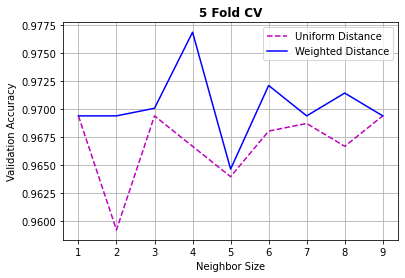

In [ ]:
df1=df.loc[df['Distance Weights'] == "uniform"]
df1 = df1.groupby("NeighbourSize")
df1 = df1.mean()
df2=df.loc[df['Distance Weights'] == "distance"]
df2 = df2.groupby("NeighbourSize")
df2 = df2.mean()
x1=df1.index
y1=df1["Validation Accuracy"]
x2=df2.index
y2=df2["Validation Accuracy"]
plt.subplot(1,1,1)
plt.plot(x1,y1,"--m",label="Uniform Distance")
plt.plot(x2,y2, color='b', label="Weighted Distance")

plt.title("5 Fold CV", fontweight="bold")
plt.ylabel('Validation Accuracy')
plt.xlabel('Neighbor Size')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

In [ ]:
df2=df.loc[df['Distance Weights'] == "distance"]

In [ ]:
df2 = df2.groupby("NeighbourSize")

In [ ]:
df2.mean()

,Validation Accuracy
NeighbourSize,
1,0.969409
2,0.969409
3,0.970088
4,0.976886
5,0.964650
6,0.972128
7,0.969409
8,0.971448
9,0.969409


# Prediction & Performance

In [ ]:
#this cell is re-run to train the final model on the entire train & validation set
X_train=train.iloc[:,:-3]
y_train=train["Label"]
X_test=test.iloc[:,:-3]
y_test=test["Label"]
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 8, weights="distance")
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

In [ ]:
get_scores(y_test, y_pred, "kNN")

,Classifier,Accuracy,F1-Score (Macro),Precision (Macro),Recall (Macro),F1-Score (Micro),Precision (Micro),Recall (Micro),F1-Score (Weighted),Precision (Weighted),Recall (Weighted)
0,kNN,0.909739,0.907207,0.913324,0.9056,0.909739,0.909739,0.909739,0.90914,0.912845,0.909739


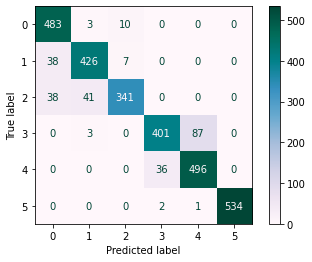

In [ ]:
conf = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

# w/ Feature Selection

In [ ]:
selector = SelectFromModel(estimator=LogisticRegression(max_iter=10000)).fit(X_train, y_train)
#bc knn does not give feature importance/coefficients etc

In [ ]:
selector.threshold_

0.9650203508155041

In [ ]:
X_new_train=selector.transform(X_train)
X_new_test=selector.transform(X_test)

In [ ]:
X_new_train.shape

(7352, 190)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 8, weights="distance")
knn.fit(X_new_train, y_train)
y_new_pred=knn.predict(X_new_test)
get_scores(y_test, y_new_pred, "kNN")

,Classifier,Accuracy,F1-Score (Macro),Precision (Macro),Recall (Macro),F1-Score (Micro),Precision (Micro),Recall (Micro),F1-Score (Weighted),Precision (Weighted),Recall (Weighted)
0,kNN,0.927723,0.925722,0.930591,0.924607,0.927723,0.927723,0.927723,0.9272,0.930478,0.927723


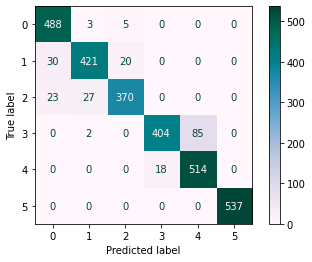

In [ ]:
conf = confusion_matrix(y_test, y_new_pred)
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)